In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from source_code.card_detector import CardDetector, fit
from source_code.dataloader_utils import MTGCardsDataset, get_transform_pipe
from source_code.config import *

In [2]:
anchor_boxes = torch.Tensor([[198.27963804, 206.74086672],
       [129.59395666, 161.90171490],
       [161.65437828, 232.34624509]
]) # Anchor boxes acquired from k-means clustering of the dataset

model = CardDetector(
  img_dims= (CONFIG["dataset"]["img_w"], CONFIG["dataset"]["img_h"]),
  anchor_boxes=anchor_boxes,
  num_anchors_per_cell=CONFIG["dataset"]["num_anchors_per_cell"],
)

feature_map_dims = (model.features_w, model.features_h)

transform_pipe = get_transform_pipe(img_w=CONFIG["dataset"]["img_w"], img_h=CONFIG["dataset"]["img_h"])

train_dataset = MTGCardsDataset(
  annotations_file=CONFIG["dataset"]["annotations_file_train"],
  img_dir=CONFIG["dataset"]["img_dir"], #TODO: change directory when we have the actual data
  anchor_boxes=model.anchor_boxes,
  feature_map_dims=feature_map_dims,
  img_dims= (CONFIG["dataset"]["img_w"], CONFIG["dataset"]["img_h"]),
  num_anchors_per_cell=CONFIG["dataset"]["num_anchors_per_cell"],
  num_max_boxes=CONFIG["dataset"]["num_max_boxes"],
  transform=transform_pipe,
  limit=CONFIG["dataset"]["limit"]
)
train_dataloader = DataLoader(train_dataset, batch_size=CONFIG["dataloader"]["batch_size"])

val_dataset = MTGCardsDataset(
  annotations_file=CONFIG["dataset"]["annotations_file_val"],
  img_dir=CONFIG["dataset"]["img_dir"], #TODO: change directory when we have the actual data
  anchor_boxes=model.anchor_boxes,
  feature_map_dims=feature_map_dims,
  img_dims= (CONFIG["dataset"]["img_w"], CONFIG["dataset"]["img_h"]),
  num_anchors_per_cell=CONFIG["dataset"]["num_anchors_per_cell"],
  num_max_boxes=1,
  transform=transform_pipe,
  limit=CONFIG["dataset"]["limit"]
)
val_dataloader = DataLoader(val_dataset, batch_size=CONFIG["dataloader"]["batch_size"]) 

test_dataset = MTGCardsDataset(
  annotations_file=CONFIG["dataset"]["annotations_file_test"],
  img_dir=CONFIG["dataset"]["img_dir"], #TODO: change directory when we have the actual data
  anchor_boxes=model.anchor_boxes,
  feature_map_dims=feature_map_dims,
  img_dims= (CONFIG["dataset"]["img_w"], CONFIG["dataset"]["img_h"]),
  num_anchors_per_cell=CONFIG["dataset"]["num_anchors_per_cell"],
  num_max_boxes=CONFIG["dataset"]["num_max_boxes"],
  transform=transform_pipe,
  limit=CONFIG["dataset"]["limit"]
)
test_dataloader = DataLoader(test_dataset, batch_size=CONFIG["dataloader"]["batch_size"]) 

In [3]:
opt = torch.optim.Adam(params=model.parameters(), lr=CONFIG["optimizer"]["lr"])
fit(
    model=model,
    num_epochs=CONFIG["optimizer"]["num_epochs"],
    optimizer=opt, 
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    device=("cuda" if torch.cuda.is_available() else "cpu")
)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 0


c:\Users\vikio\anaconda3\envs\nsiete_pytorch_project\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Looked at 0 Batches	---	0/1000 Samples
Looked at 10 Batches	---	640/1000 Samples
Looked at 15 Batches	---	1000/1000 Samples
Train Total Loss: 0.3192125638015568
Train Objectness Loss: 0.25230881199240685
Train Localization Loss: 0.06690375145990402
Val Total Loss: 0.101084865629673
Val Objectness Loss: 0.07053915411233902
Val Localization Loss: 0.030545709654688835
Val Accuracy: 0.0

Epoch: 1
Looked at 0 Batches	---	0/1000 Samples
Looked at 10 Batches	---	640/1000 Samples
Looked at 15 Batches	---	1000/1000 Samples
Train Total Loss: 0.05659695202484727
Train Objectness Loss: 0.03777164139319211
Train Localization Loss: 0.018825311271939427
Val Total Loss: 0.036541931331157684
Val Objectness Loss: 0.023747630417346954
Val Localization Loss: 0.01279429905116558
Val Accuracy: 0.0

Epoch: 2
Looked at 0 Batches	---	0/1000 Samples
Looked at 10 Batches	---	640/1000 Samples
Looked at 15 Batches	---	1000/1000 Samples
Train Total Loss: 0.028564254753291607
Train Objectness Loss: 0.018689262564294

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
kept_objectness_scores: tensor([0.0185, 0.0174, 0.0160, 0.0144, 0.0126], grad_fn=<CopyBackwards>)
kept_boxes: tensor([[-66.9228, 527.3268,  62.8332, 689.4792],
        [262.2279, 142.8405, 377.8436, 305.1135],
        [509.4197, 503.5535, 704.4091, 711.1859],
        [286.2855, 110.3112, 415.5953, 273.4509],
        [288.3563, 183.6899, 408.4551, 331.4002]], grad_fn=<CopySlices>)
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
kept_objectness_scores: tensor([0.7311, 0.5000, 0.5000, 0.5000, 0.5000])
kept_boxes: tensor([[109., 245., 216., 413.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]])
pred: tensor([[-66.9228, 527.3268,  62.8332, 689.4792],
        [262.2279, 142.8405, 377.8436, 305.1135],
        [509.4197, 503.5535, 704.4091, 711.1859],
        [286.2855, 110.3112, 415.5953, 273.4509],
        [28

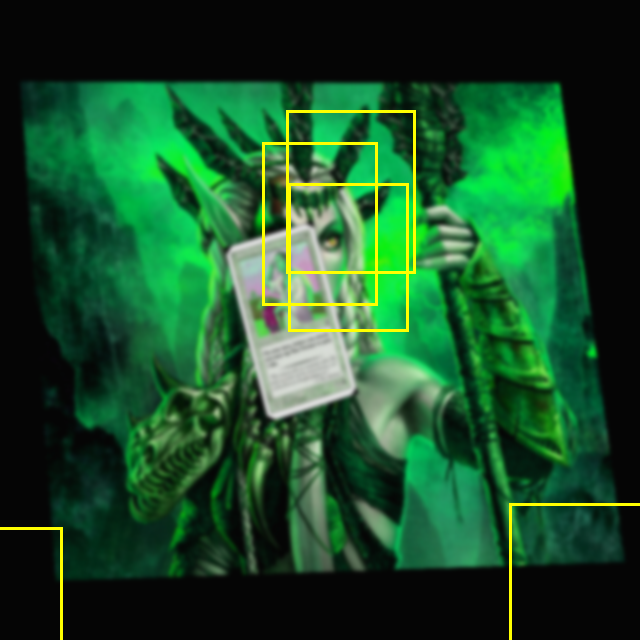

In [16]:
import torchvision.transforms.functional as fn
from torchvision.io import read_image, ImageReadMode
from torchvision.utils import draw_bounding_boxes


images, labels = next(iter(test_dataloader))

# Load the unaltered (not normalized) version of the image
test_image = read_image("data/aug_test/10618_1.png", mode=ImageReadMode.RGB)

# Predict the bounding box and get the true box
model = model.to("cpu")

pred_boxes = model.predict(images[0], keep_box_score_treshhold=0)
pred_box = pred_boxes.squeeze(0)

true_boxes = model.predict(images[0], ground_truth=labels[1].unsqueeze(0))
true_box = true_boxes.squeeze(0)[:1]

print("pred:", pred_box)
print("true:",true_box)

bbox_img_tensor = draw_bounding_boxes(image=test_image, boxes=pred_box, width=3, colors=(255,255,0))

fn.to_pil_image(bbox_img_tensor)

In [24]:
pred_box

tensor([[-66.9228, 527.3268,  62.8332, 689.4792],
        [262.2279, 142.8405, 377.8436, 305.1135],
        [509.4197, 503.5535, 704.4091, 711.1859],
        [286.2855, 110.3112, 415.5953, 273.4509],
        [288.3563, 183.6899, 408.4551, 331.4002]], grad_fn=<SqueezeBackward1>)

In [21]:
true_box

tensor([[109., 245., 216., 413.]])

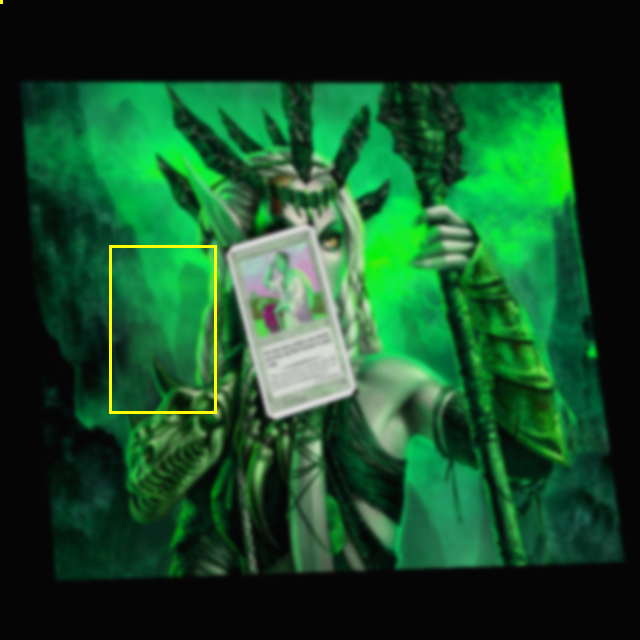

In [7]:
bbox_img_tensor = draw_bounding_boxes(image=test_image, boxes=true_box, width=3, colors=(255,255,0))

fn.to_pil_image(bbox_img_tensor)

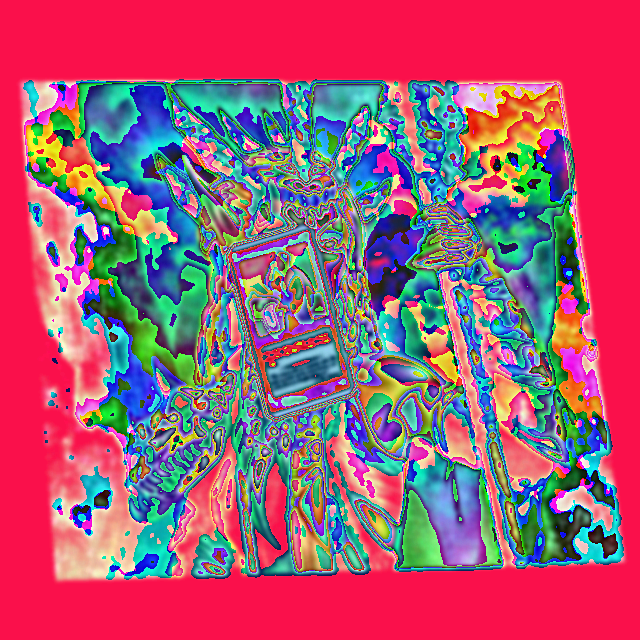

In [8]:
fn.to_pil_image(images[0])

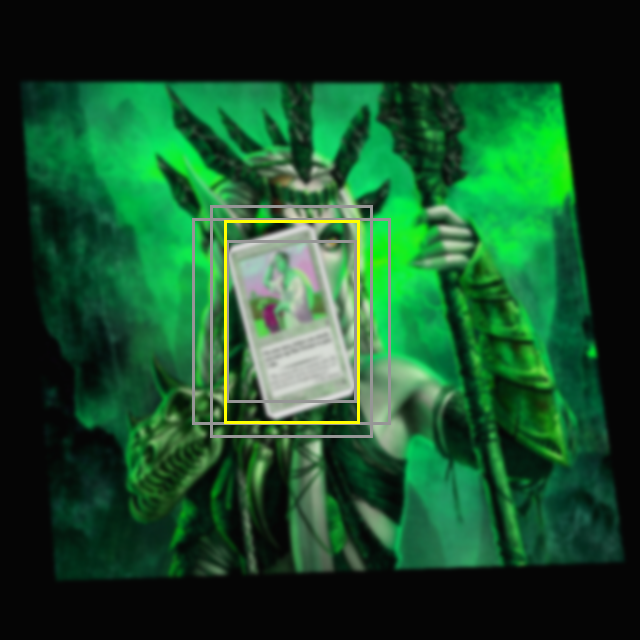

In [37]:
import numpy as np

position = [291.5,321.5,135,203]

anchors_array = np.array(anchor_boxes)
anchor_boxes_to_draw = torch.Tensor([[position[0] - anchor[0]/2, position[1] - anchor[1]/2, position[0] + anchor[0]/2, position[1] + anchor[1]/2] for anchor in anchors_array])
bbox_img_tensor = draw_bounding_boxes(image=test_image, boxes=anchor_boxes_to_draw, width=3, colors=(150,150,150))

box = [position[0] - position[2]/2, position[1] - position[3]/2, position[0] + position[2]/2, position[1] + position[3]/2]
boxes = torch.Tensor([box])
bbox_img_tensor = draw_bounding_boxes(image=bbox_img_tensor, boxes=boxes, width=3, colors=(255,255,0))

fn.to_pil_image(bbox_img_tensor)